# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
$$ ŷ(w,x) = w_0+w_1 x_1+...+w_p x_p$$
* $x$ : 입력 데이터
* $w$ : 모델이 학습할 파라미터
* $w_0$ : 편향
* $w_1∼w_p$ : 가중치


## 선형 회귀(Linear Regression)

* 선형 회귀(Linear Regression) 또는 최소 제곱법(Ordinary Least Squares)은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 평균제곱오차(Mean Squared Error) 를 최소화 하는 학습 파라미터 w를 찾음
* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  * MAE(Mean Absoulte Error)
  * MAPE(Mean Absoulte Percentage Error)
  * MSE(Mean Squared Error)
  * MPE(Mean Percentage Error)

MSE 

우리가 알고싶은 parameter  가 있다고 하자
θ 는 확률 변수 $(x_1,x_2,x_3,...,x_n)$ 으로 추정한다 
$x_1,x_2,x_3,...,x_n$ 를 관찰하고 θ 를 추정하는것을 estimator라고 하며 다음과 쓴다
$g = g(x_1,x_2,x_3,...,x_n)$

estimator $g$가 θ 와 얼마나 가까운지 알려면 $g-θ$ 혹은 $(g-θ)^2$으로 구할수있다
하지만 $g$는 상황에 따라 변화하게 되기 때문에 값을 구하기 보다는 에러의 기대값을 구하는것이 좋다
그런 의미에서 탄생한것이 평균제곱오차 MSE 이다


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

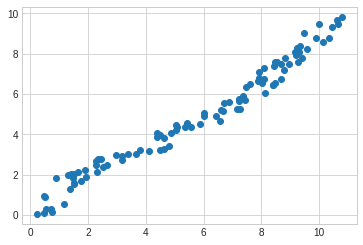

In [ ]:
noise = np.random.rand(100, 1)

X = sorted(10 * np.random.rand(100, 1)) +  noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("선형 회귀 가중치: {}",format(model.coef_))  #coef는 계수를 말한다
print("선형 회귀 편향: {}".format(model.intercept_))  # 독립항을 말한다

#coef에서  회귀 분석의 선형모델의 식에서 현재는 x1 밖에 값이 들어가 있지 않기 때문에 coef 는 w1에 해당하고
#intercept는 독립항 이기 때문에 w0에 해당한다

선형 회귀 가중치: {} [0.82306985]
선형 회귀 편향: 0.28948157523621365


In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9688951458786693
평가 데이터 점수: 0.9679853153725918


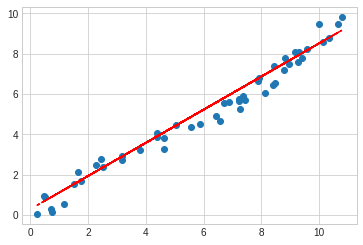

In [ ]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r');

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온것
* 해리슨(Harrision) 과 루빈펠트(Rubinfeld) 의 논문 "Hedonic prices and the demand for clean air~" 에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사구역과 주택 가격에 영향을 주는 속성 21개로 구성

속성
* CRIM : 자치시별 1인당 범죄율
* ZN : 25,000 평방 피트가 넘는 거주지역 토지 비율
* INDUS : 자치시별 비소매 상업지역 토지 비율
* CHAS : 찰스 강에 대한 변수(강의 경계에 위치하면 1, 그렇지 않으면 0)
* NOX : 10,000,000 당 일산화질소 농도
* RM : 주택 1가구당 평균 방의 수
* AGE : 1940년 이전에 건축된 소유주택 비율
* DIS : 5개의 보스턴 고용 센터까지의 가중 거리
* RAD : 방사형 고속도로 접근성 지수
* TAX : 10,000 달러당 재산 세율
* PTRATIO : 자치시별 학생/교사 비율
* B : 1000(Bk.63)^2,Bk: 자치시별 흑인 비율
* LSTAT : 모집단의 하위계층 비율(%)
* MEDV : 소유자가 거주하는 주택가격(중앙값)(단위 : 1,000 달러)

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


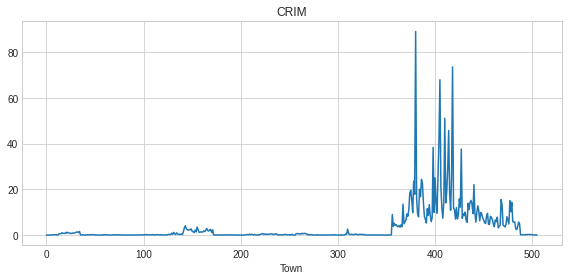

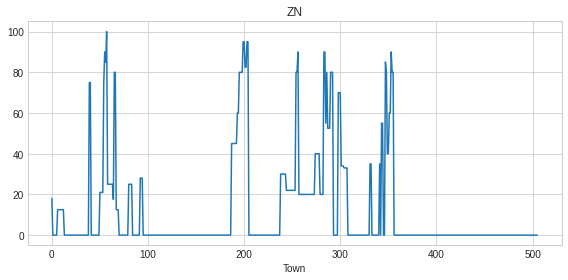

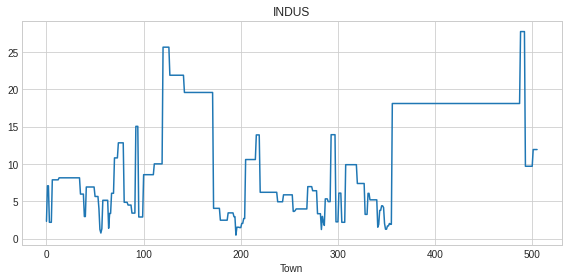

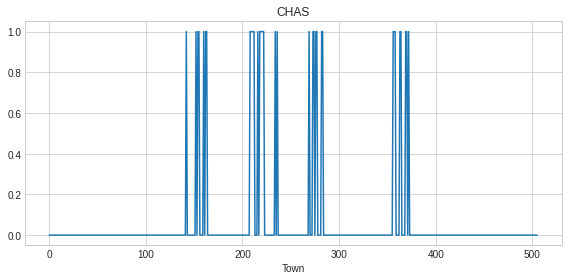

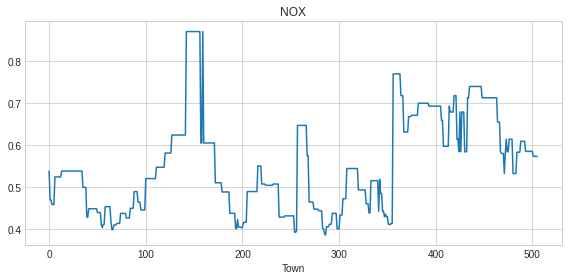

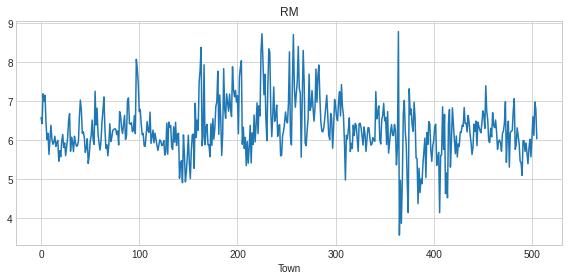

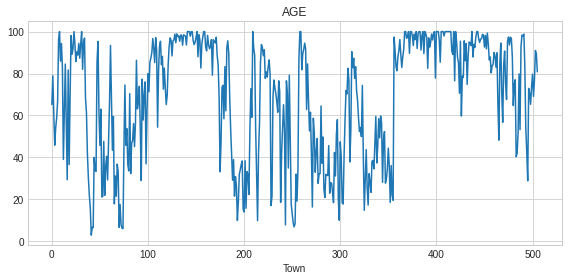

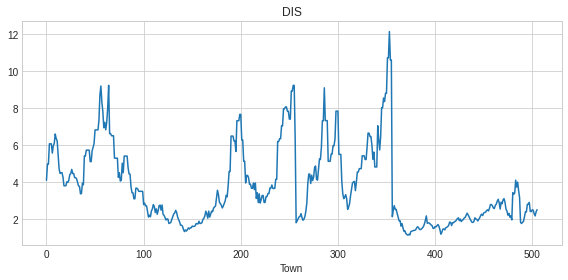

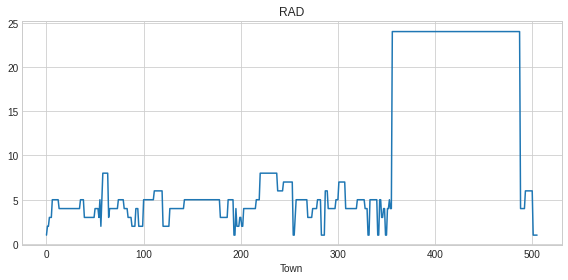

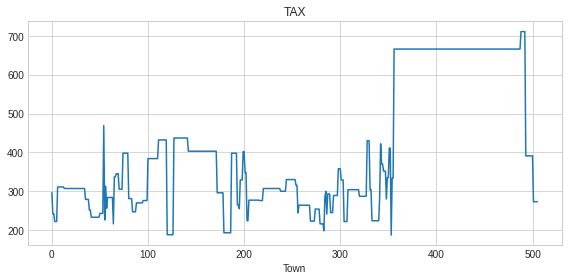

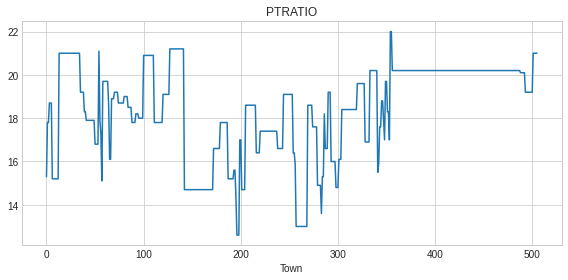

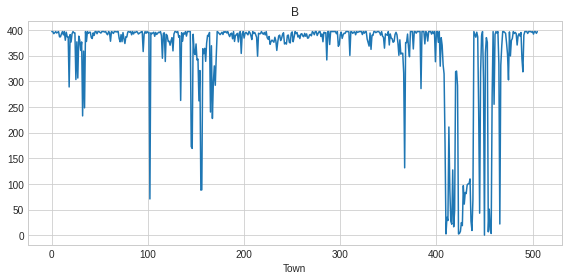

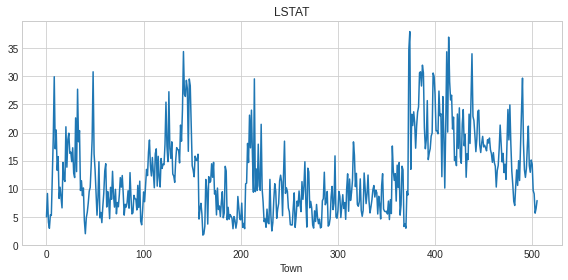

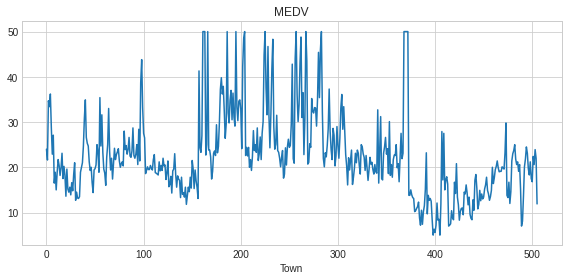

In [ ]:
for i ,col in enumerate(boston_df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(boston_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

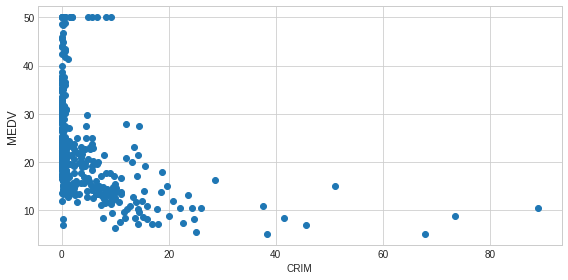

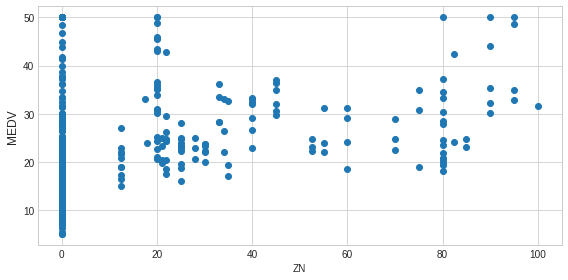

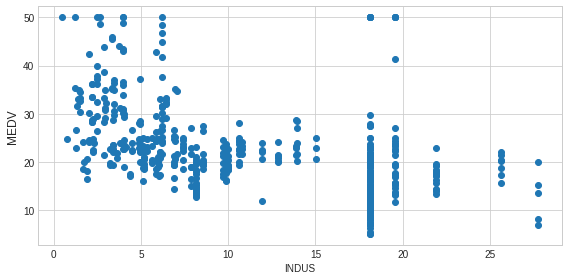

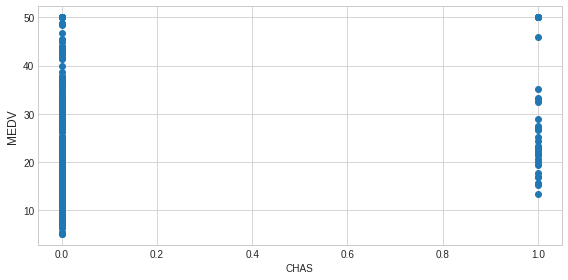

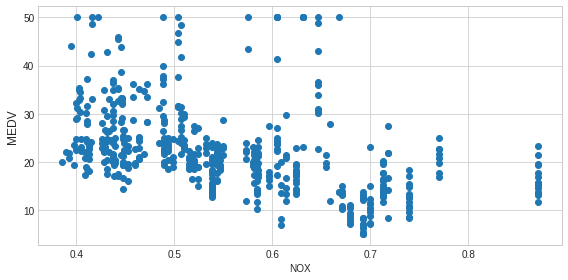

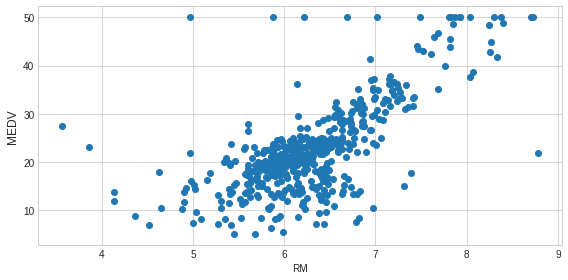

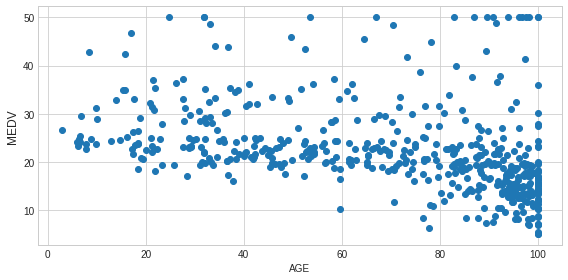

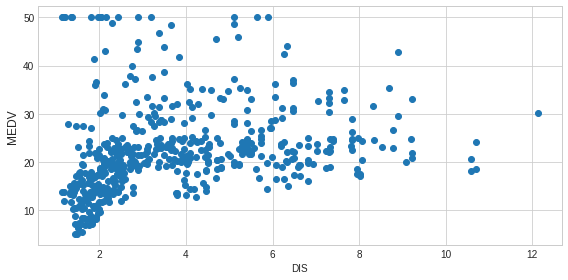

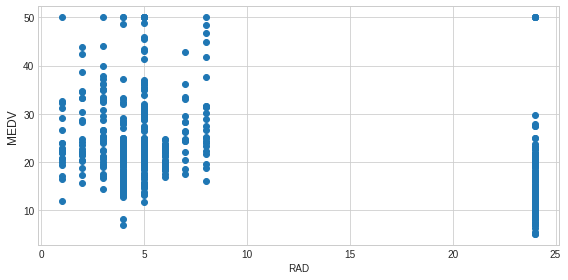

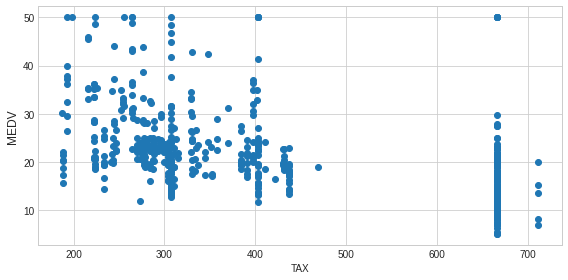

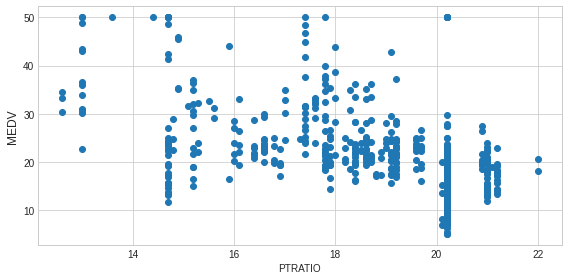

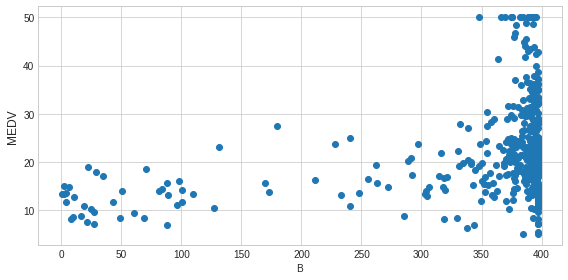

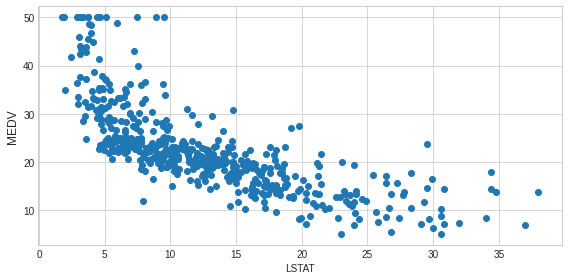

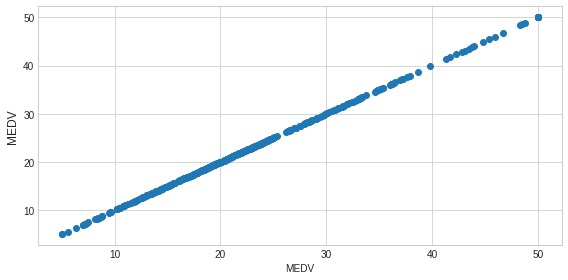

In [ ]:
for i ,col in enumerate(boston_df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(boston_df[col], boston_df['MEDV'])
  plt.ylabel('MEDV',size=12)
  plt.xlabel(col)
  plt.tight_layout()


In [ ]:
import seaborn as sns

#sns.pairplot(boston_df);


### 보스턴 주택 가격에 대한 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7446100789925416
평가 데이터 점수: 0.7052369664513327


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만,데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로(NMSE(Negative Mean Squared Error)를 사용

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores: {}".format(scores))
print("NMSE scores mean {}".format(scores.mean()))
print("NMSE scores std: {}".format(scores.std()))


NMSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean -34.70525594452486
NMSE scores std: 45.573999200308776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, R^2) 사용

In [ ]:

r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2') # scoring 값에 r2 를 주게 되면 r2값이 출력되게 된다
print("R2 scores: {}".format(r2_scores))
print("R2 scores mean {}".format(r2_scores.mean()))
print("R2 scores std: {}".format(r2_scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean 0.20252899006056407
R2 scores std: 0.5952960169512279


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_ : 추정된 가중치 벡터

In [ ]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

# 13개의 각각의 feature = x 에 대해서 얼만큼의 w 값을 주는지가 결정
# 모델이 학습이 됐을때 모델이 잘나오게끔 fit 했고 그 fit 한 결과가 다음과 같은 w값을 각각의 feature에다가 곱하는 형태로 선형 함수를 만든다는것이다

y = 36.48225292894243 
-0.10974744194411876 * x0
0.04299247343528027 * x1
0.03370775905624093 * x2
2.9673872591993624 * x3
-17.598744301995417 * x4
3.9606470092716743 * x5
-0.005114637822467687 * x6
-1.551762510851847 * x7
0.3114478248845033 * x8
-0.012481456831797489 * x9
-0.9901879564460546 * x10
0.010300200993882177 * x11
-0.5409191478084997 * x12


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))  #y_train 예측값과 y_train 값을 비교해서 거기에 나오는 오차 측정 = mean square error
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

#RMSE = Root Mean Square Error는 낮으면 좋고
#R2는 높으면 좋다
#RMSE 와 R2 가 가지고 있는 의미에대해서 알아보자

RMSE: 4.849814005654818
R2 Score: 0.7446100789925416


In [ ]:

y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 3.9855252559486125
R2 Score: 0.7052369664513327


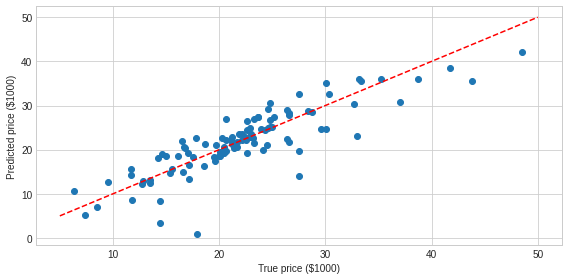

In [ ]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r')
  plt.xlabel('True price ($1000)')
  plt.ylabel('Predicted price ($1000)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격 데이터

속성

* Medinc : 블록의 중간 소득
* HouseAge : 블록의 중간 주택 연도
* AveRooms : 평균 방 수
* AveBedms : 평균 침실 수
* Population : 블록 내 거주중인 인구수
* AveOccup : 평균 주택 점유율
* Latitude : 주택 블록 위도
* Longitude : 주택 블록 경도

In [ ]:
from sklearn.datasets import fetch_california_housing

california =fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [ ]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


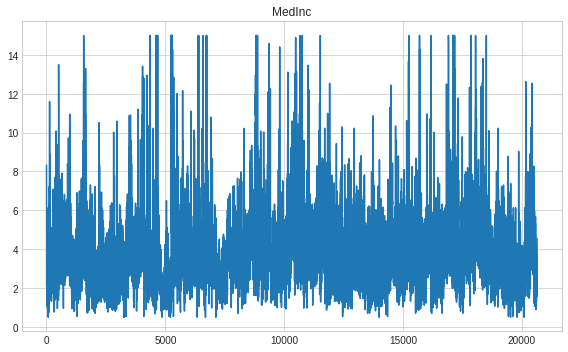

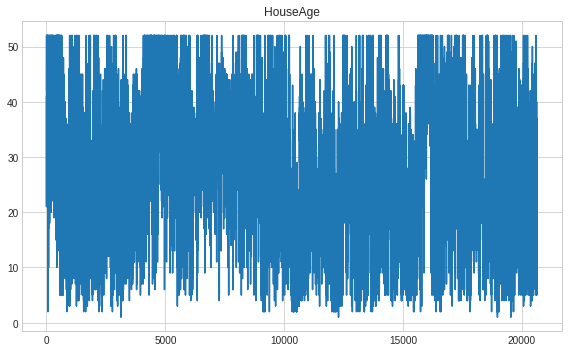

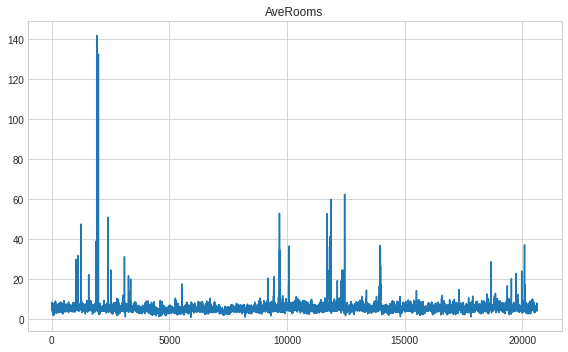

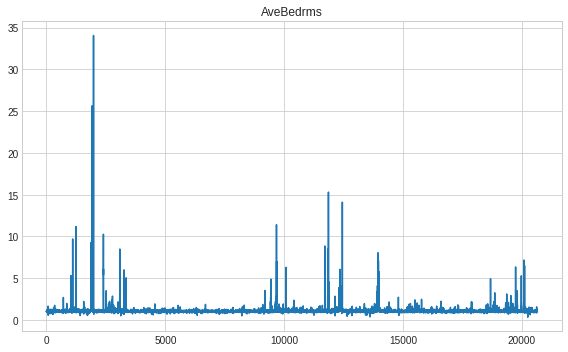

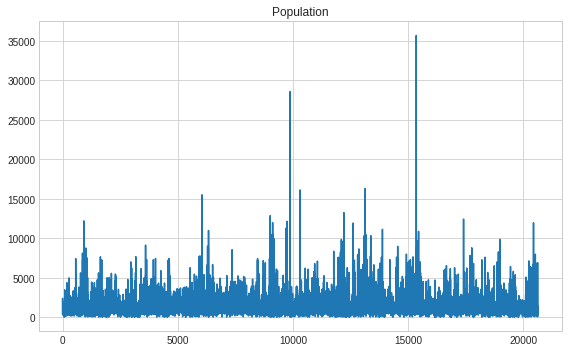

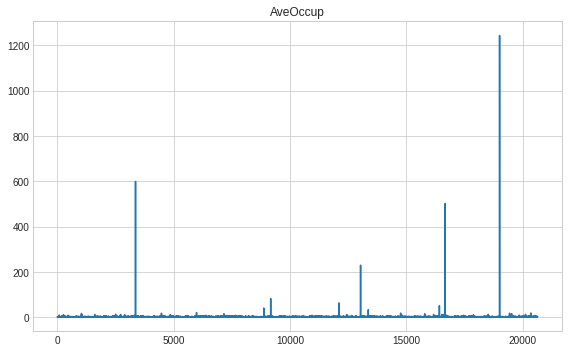

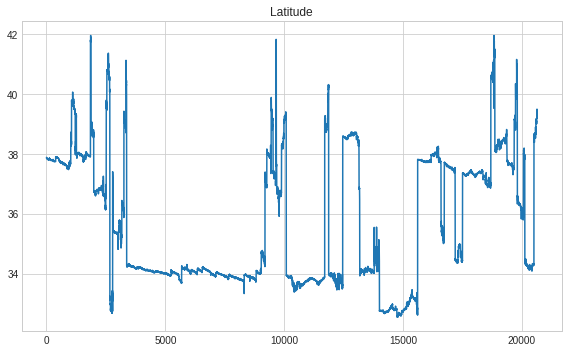

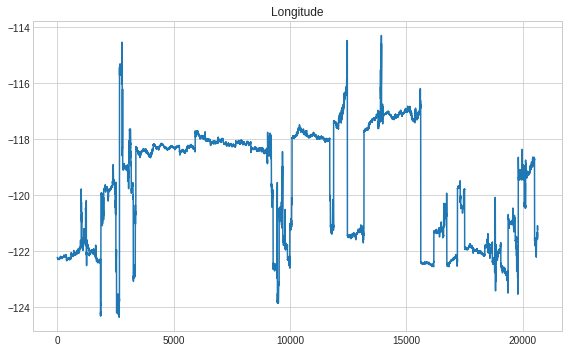

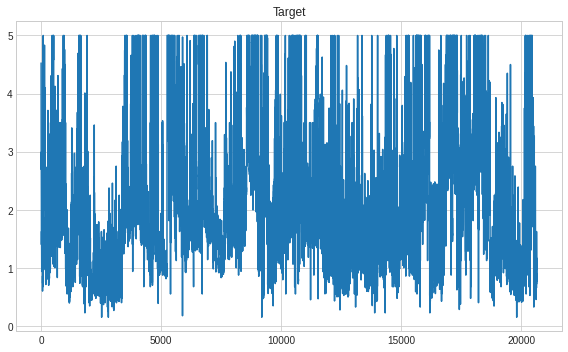

In [ ]:
import matplotlib.pyplot as plt
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8, 5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

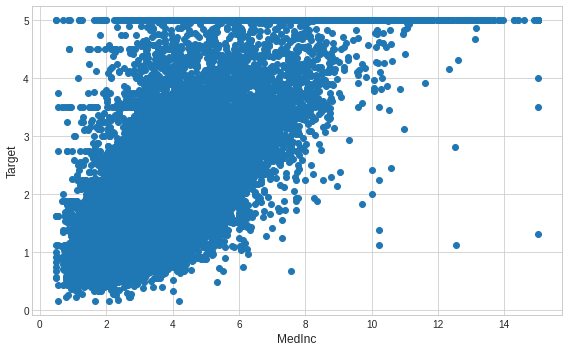

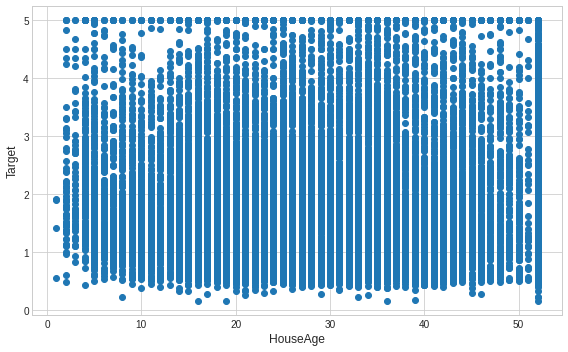

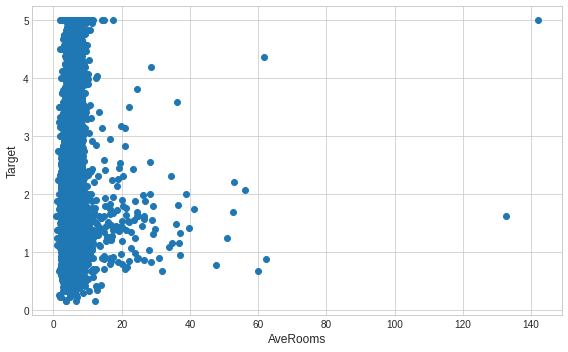

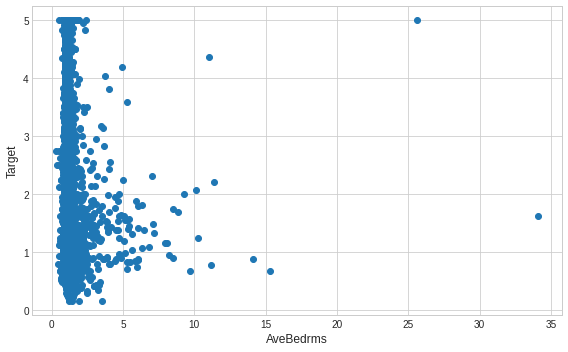

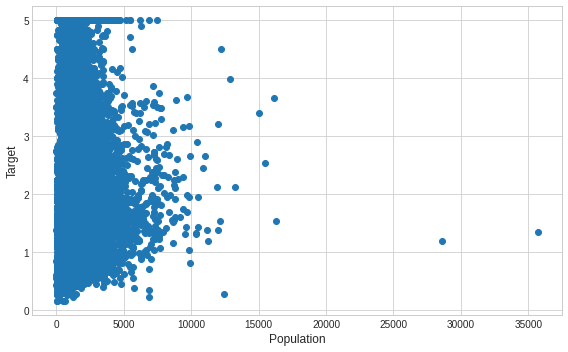

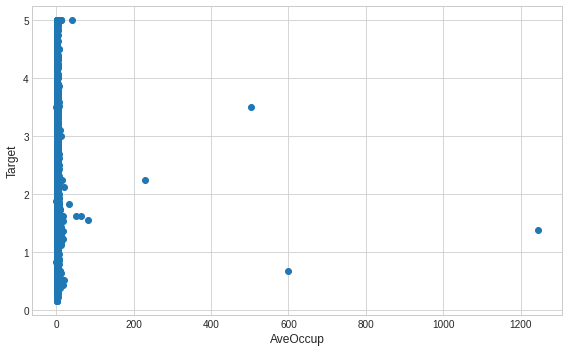

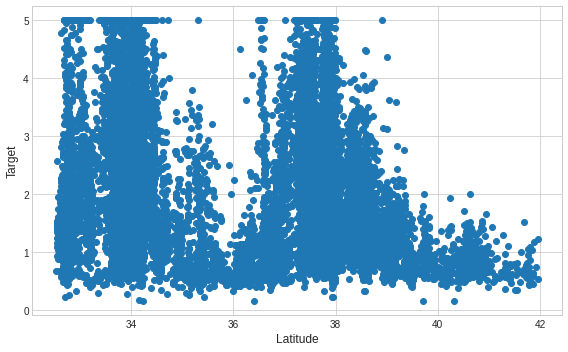

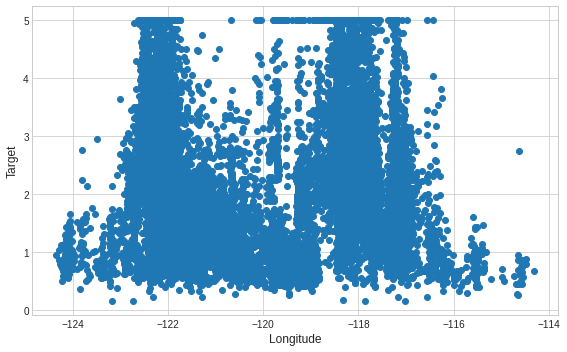

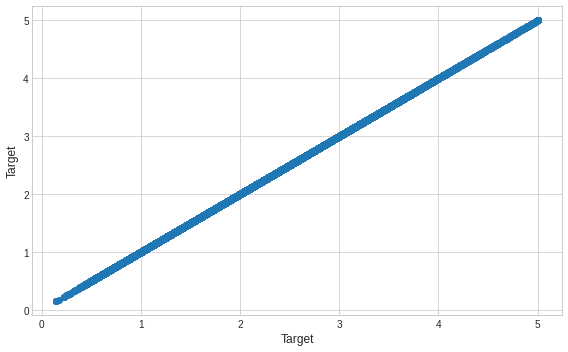

In [ ]:
import matplotlib.pyplot as plt
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8, 5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

In [ ]:
import seaborn as sns

#sns.pairplot(california_df.sample(1000));


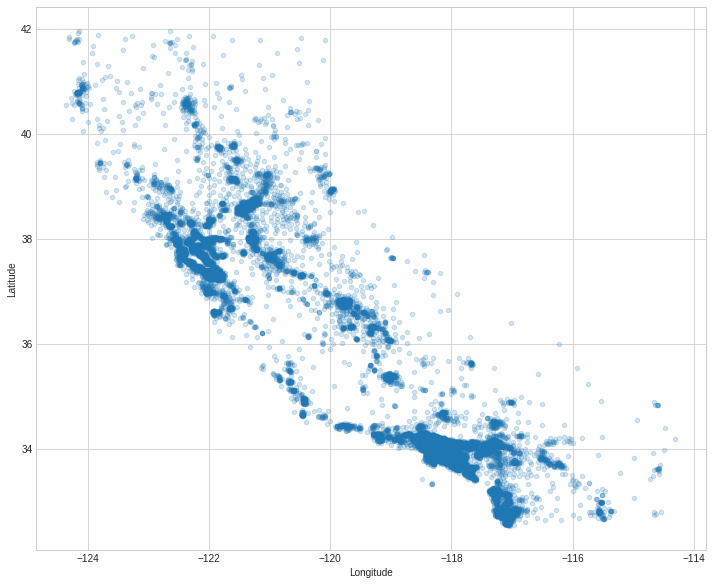

In [ ]:
#Latitude : 주택 블록 위도 Longitude : 주택 블록 경도
california_df.plot(kind='scatter',x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));


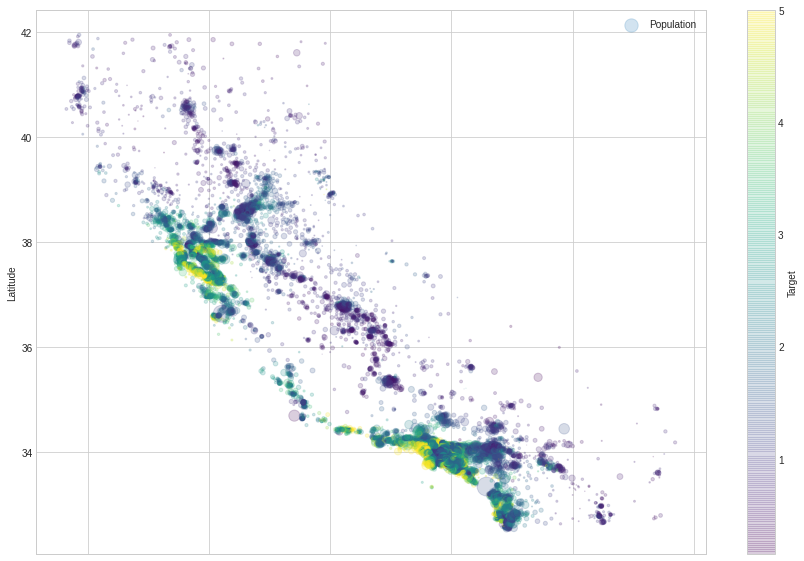

In [ ]:
california_df.plot(kind='scatter',x='Longitude', y='Latitude', alpha=0.2, 
                   s=california_df['Population']/100, label='Population', figsize=(15, 10),
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

# population의 사이즈가 큰것은 인구수가 많다는 것이고, 어두운 색에 가까울수록 가격이 싸다

### 캘리포니아 주택 가격에 대한 선형 회귀

In [ ]:
model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

scores =cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std: {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean: {}'.format(r2_scores.mean()))


In [ ]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = -37.314828162191105 
0.43568561762557156 * x0
0.00951384376354521 * x1
-0.10309881519203758 * x2
0.6265644488657041 * x3
-3.9701102376361794e-06 * x4
-0.0034177508584540646 * x5
-0.4254459430773837 * x6
-0.43881328768865135 * x7


In [ ]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7232398506433408
R2 Score: 0.6071142459670148


In [ ]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7277250097719783
R2 Score: 0.6018753936113279


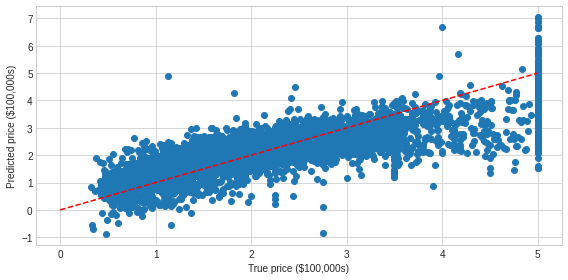

In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted price ($100,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feautre)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization) 를 거는것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대 적합을 막을 수 있게 됨
* 다중공선성 문제는 두특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음
$$ RidgeMSE = {1\over N}\sum_{i=1}^N (y_i-ŷ_i)^2 + α\sum_{i=1}^p w_i^2 $$
* α : 사용자가 지정하는 매개변수
* α 가 크면 규제의 효과가 커지고, α가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#별별
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7701775406733515
평가 데이터 점수 : 0.6398456996038777


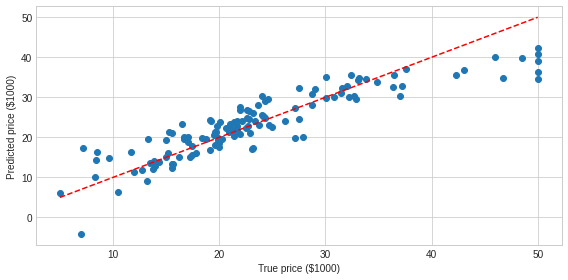

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더좋음
* 일반화 성능에 영향을 주는 매개변수인 α 값을 조정해보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)


In [ ]:
#별별
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)


Ridge(alpha=0.1)

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6061888786274986
평가 데이터 점수 : 0.6056211905394348


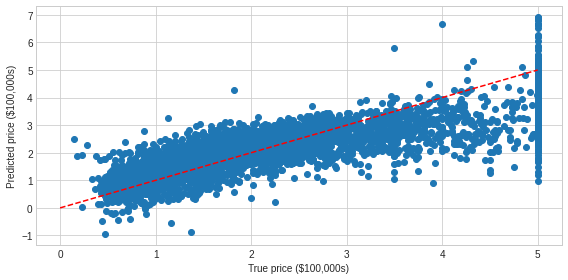

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음
$$LassoMSE = {1\over N}\sum_{i=1}^N (y_i - ŷ_i)^2 +α\sum_{i=1}^p |w_i|  $$
* 라쏘 회귀도 매개변수인 α 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#별별
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.734873678384212
평가 데이터 점수 : 0.7542931179079596


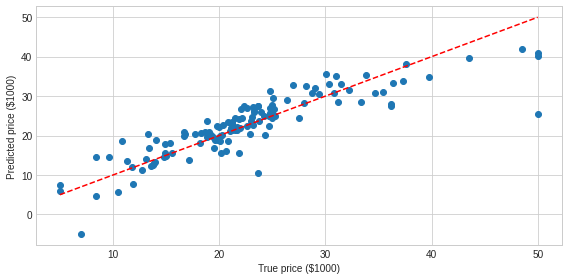

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [ ]:
#별별
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6084943285222989
평가 데이터 점수 : 0.5956862715513851


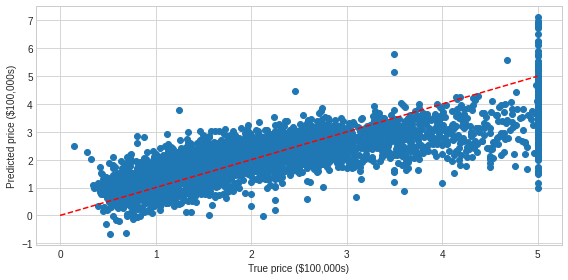

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망(Elastic-Net)

* 신축만은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌
* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
$$ElasticMSE = {1\over N} \sum_{i=1}^N (y_i - ŷ_i)+αρ\sum_{i=1}^p |w_i| + α(1-ρ)\sum_{i=1}^p w_i^2$$
* α: 규제 강도를 조절하는 매개 변수
* ρ: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#별별
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7174370716082353
평가 데이터 점수: 0.7732407587766497


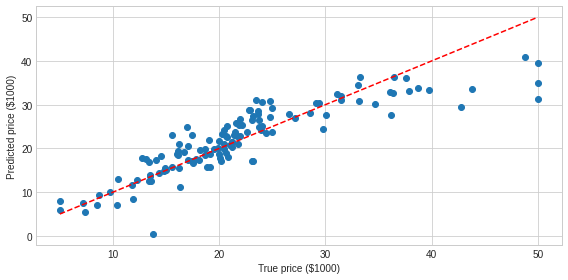

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 신축망

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [ ]:
#별별
model=ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6108837940128222
평가 데이터 점수: 0.5798888406808262


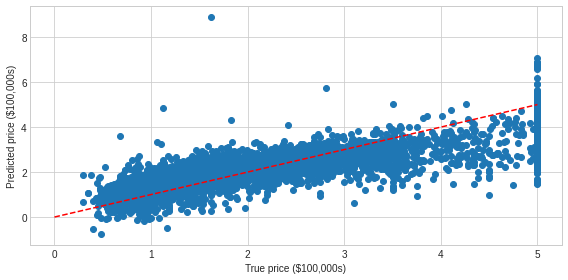

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 직교 정합 추구(Orthogonal Matchin Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표
$$ arg min||y-ŷ|_2^2subject to||w||_0 ≤  k$$
* $||w||_0$: 가중치 벡터 w에서 0이 아닌 값의 개수
* 직교 정합 추구 방법은 가중치 벡터 w에서 0이 아닌 값이 k개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [ ]:
X, y= load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#별별
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7147928497377545
평가 데이터 점수: 0.7346410833763967


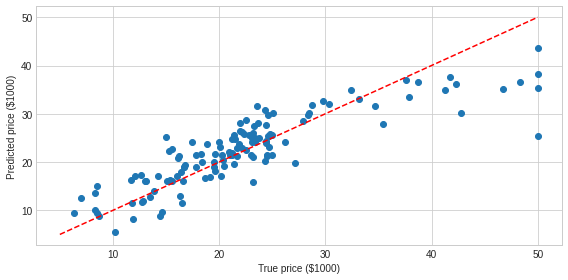

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능
$$ arg min||w||_0subject to||y-ŷ|_2^2 ≤  tol$$
* $||y-ŷ|_2^2$ 는 $\su_{i=1}^N (y - ŷ)^2$ 와 같은 의미
* 위의 식을 통해서 직교 정합 추구 방법을 y와 ŷ 사이의 오차 제곱합을 tol 이하로 하면서 $||w||_0$ 를 최소로 하는 모델로 대체 가능

In [ ]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:766: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return_n_iter=True,


OrthogonalMatchingPursuit(tol=1.0)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7430915138955376
평가 데이터 점수: 0.7204303832231433


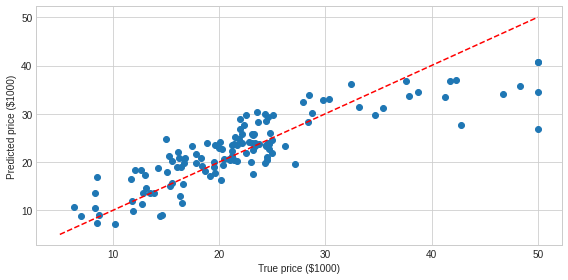

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)


In [ ]:
#별별
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5969740850909967
평가 데이터 점수: 0.6033438626135159


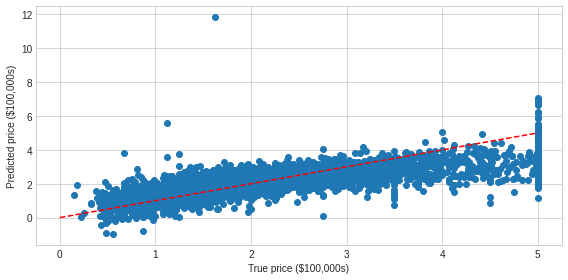

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [ ]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:766: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return_n_iter=True,


OrthogonalMatchingPursuit(tol=1.0)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6051210062448809
평가 데이터 점수: 0.6047379020528816


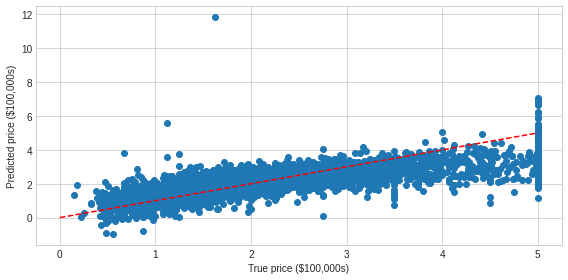

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 다항 회귀(Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델
$$ŷ = w_1x_1+w_2x_2+w_3x_3+w_4x_1^2+w_5x_2^2$$
* 차수가 높아질수록 더 복잡한 데이터 학습 가능

### 보스턴 주택 가격에 대한 다항 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
X, y= load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) # random_state=123 으로 지정하면 고정된다

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#별별
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9346787783950694
평가 데이터 점수: 0.8257864718002359


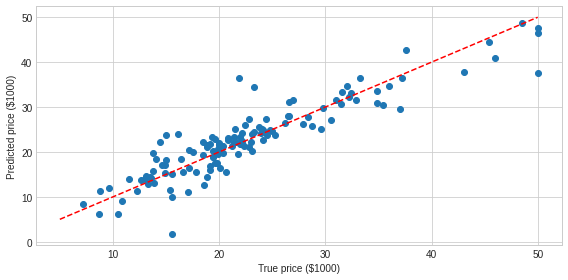

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 다항 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)


In [ ]:
#별별
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6864678935214297
평가 데이터 점수: 0.6520348323140366


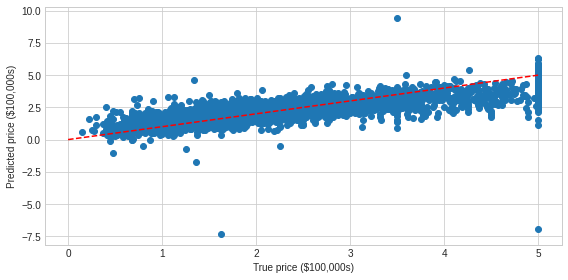

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 참고문헌

* scikit-learn 사이트 : https://scikit-learn.org/